In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

2025-05-25 14:05:00.473107: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [23]:
# load sample image from Data
image = tf.io.read_file("./Data/traffic_img.jpg")
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 500])

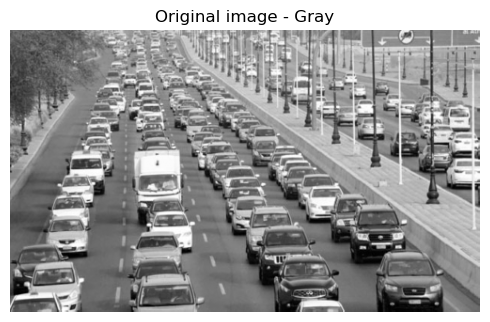

In [24]:
# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original image - Gray')
plt.show();

In [25]:
# Define conv kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

In [26]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

In [29]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [30]:
# convolution layer
conv_fn = tf.nn.conv2d

In [31]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

Text(0.5, 1.0, 'Convolution')

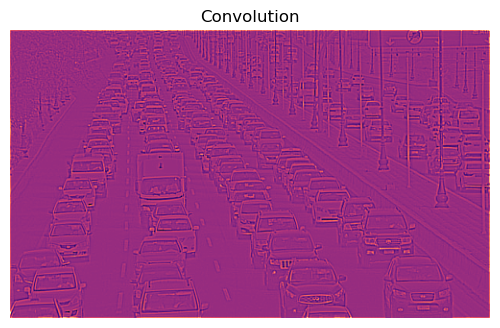

In [32]:
# Plot the convolved image 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

In [33]:
# activation layer
relu_fn = tf.nn.relu

In [34]:
# Image detection
image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

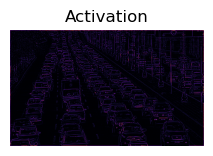

In [35]:
plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
 
plt.axis('off')
plt.title('Activation')

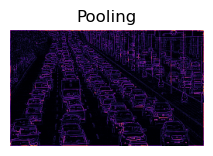

In [36]:
# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )
 
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()